In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import List
import seaborn as sns

In [8]:
df = pd.read_csv('data/fire_eye.csv')






In [16]:
#Covariance of Sub Features:

def get_subfeature_from_feature(feature: str) -> List[str]:
    return_list = []
    for i in range(3):
        for j in range(3):
            return_list.append(f"{feature}_{i}_{j}")

    return return_list









Text(0.5, 1.0, 'Correlation Matrix of Fire Mask Sub Features')

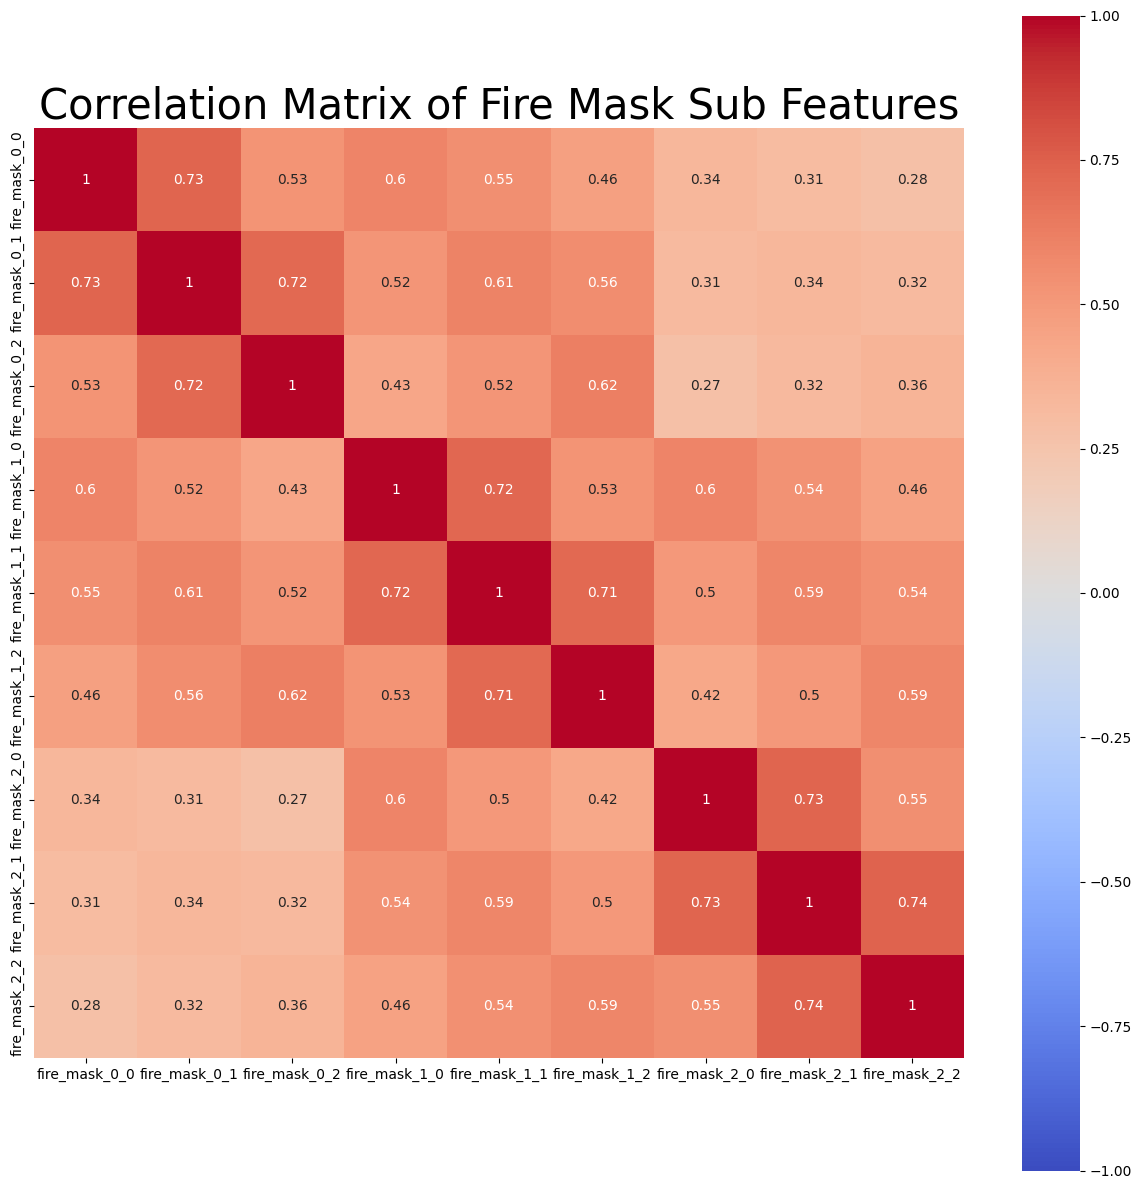

In [19]:
fire_mask_only_df = df[get_subfeature_from_feature('fire_mask')]

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(fire_mask_only_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', square=True, annot=fire_mask_only_df.corr().round(2))
plt.title("Correlation Matrix of Fire Mask Sub Features", fontsize=30)


Text(0.5, 1.0, 'Correlation Matrix of Temp. Max Sub Features')

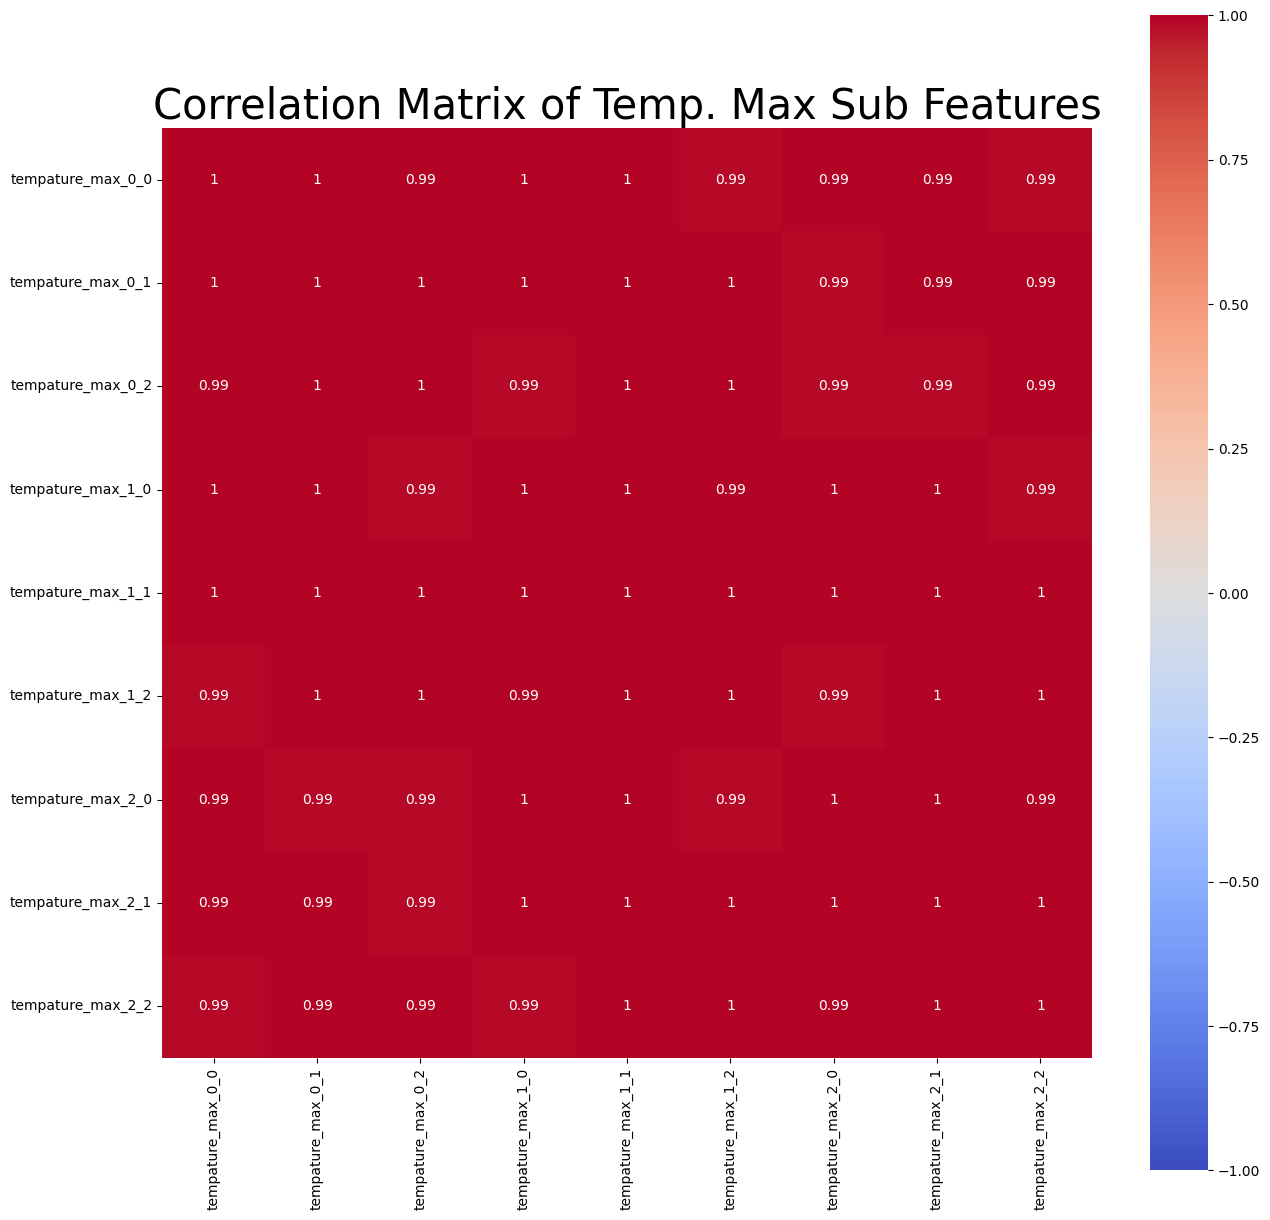

In [21]:
fire_mask_only_df = df[get_subfeature_from_feature('tempature_max')]

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(fire_mask_only_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', square=True, annot=fire_mask_only_df.corr().round(2))
plt.title("Correlation Matrix of Temp. Max Sub Features", fontsize=30)

In [24]:


feature_list = [
    'fire_mask',
    'fire_mask_next_day', 
    'elevation', 
    'wind_direction', 
    'wind_speed', 
    'energy_release_component', 
    'burn_index', 
    'precipitation', 
    'tempature_min', 
    'tempature_max', 
    'drought_index', 
    'vegetation', 
    'population_density'
]

avg_df = pd.DataFrame()

for feature in feature_list[2:]:
    avg_df[feature] = df[get_subfeature_from_feature(feature)].mean(axis=1)

for feature in get_subfeature_from_feature('fire_mask'):
    avg_df[feature] = df[feature]


     elevation  wind_direction  wind_speed  energy_release_component  \
0  1710.111111      303.175166    1.995621                 51.084568   
1  1892.444444      297.816167    1.995381                 54.412954   
2  1712.555556      304.365332    1.893072                 50.100931   
3  1819.000000      295.258181    1.997405                 50.592136   
4  1932.111111      287.100631    1.994565                 49.049513   

   burn_index  precipitation  tempature_min  tempature_max  drought_index  \
0   34.686340            0.0     268.246551     286.528622      -2.021302   
1   37.194469            0.0     268.190792     285.693954      -2.182918   
2   33.732225            0.0     267.087404     285.863770      -2.671727   
3   34.775117            0.0     267.732840     285.783278      -2.649808   
4   33.948774            0.0     266.810360     285.153553      -3.024360   

    vegetation  population_density  fire_mask_0_0  fire_mask_0_1  \
0  1650.444444            0.083331  

Text(0.5, 1.0, 'Correlation Matrix of Averaged Features')

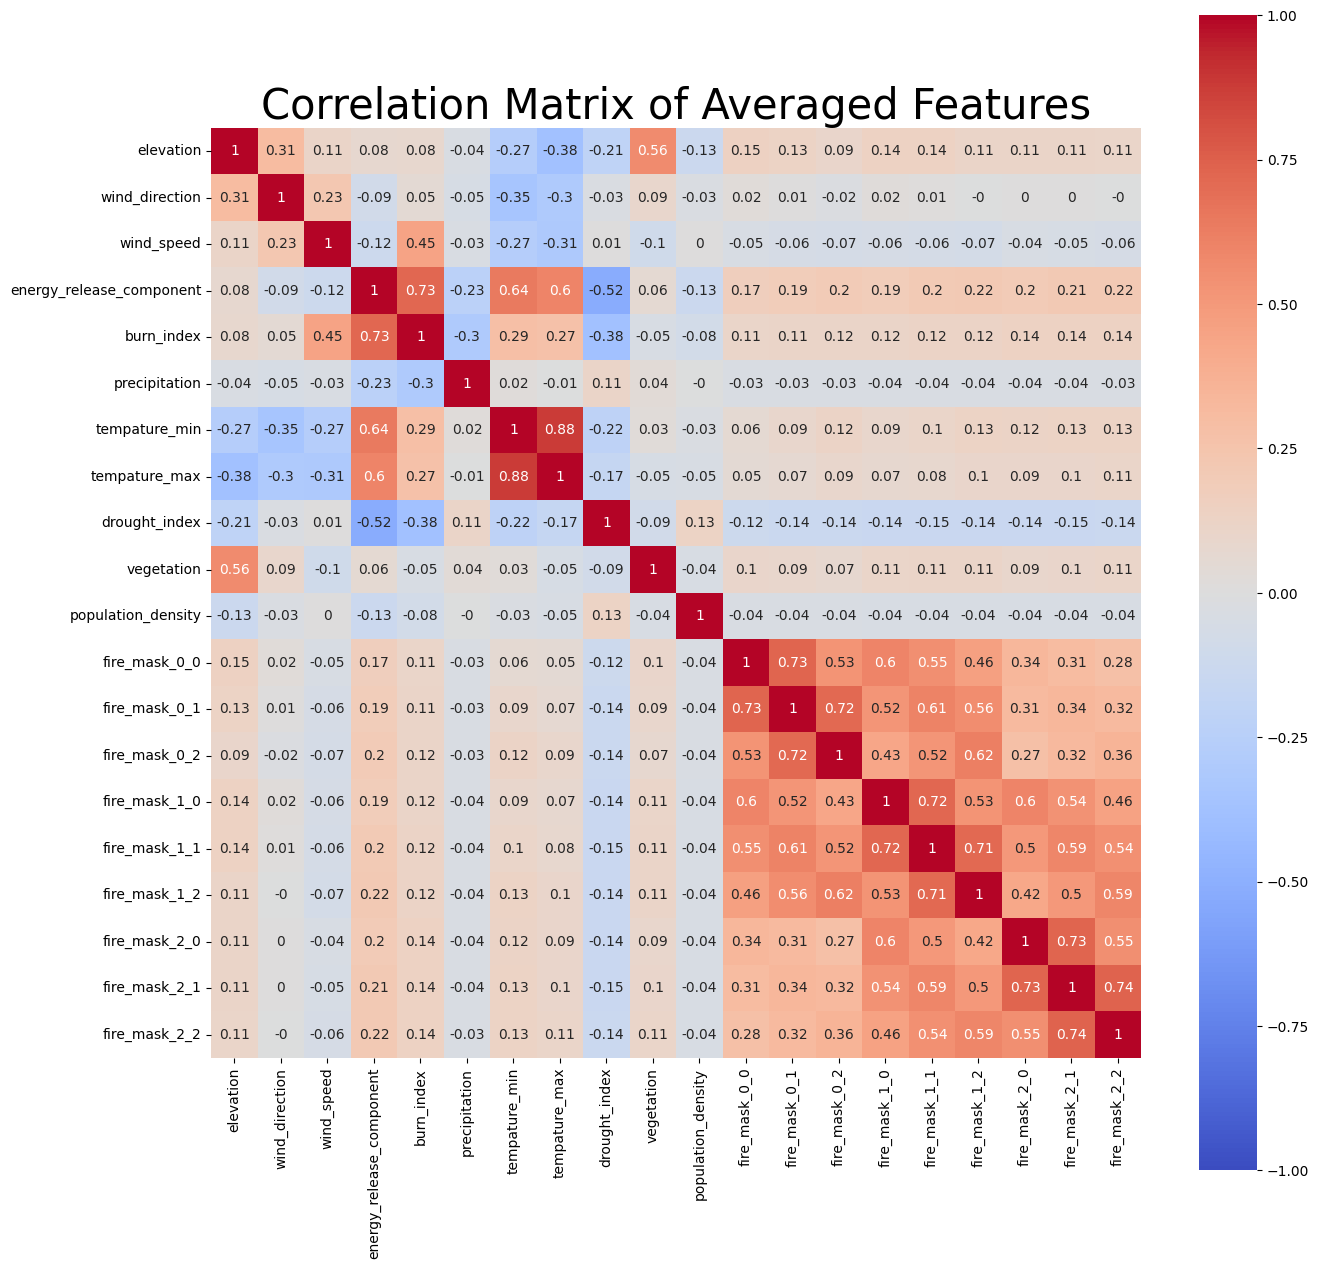

In [26]:

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(avg_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', square=True, annot=avg_df.corr().round(2))
plt.title("Correlation Matrix of Averaged Features", fontsize=30)

In [28]:
avg_df['fire_mask_next_day'] = df['fire_mask_next_day']
avg_df.to_csv('data/fire_eye_avg.csv')